# <center> INTRODUCTION À PYTHON POUR L'ÉCONOMIE APPLIQUÉE</center>
## <center> EXERCICES : No 2</center>
#### <center>Michal Urdanivia (UGA)</center>
#### <center> michal.wong-urdanivia@univ-grenoble-alpes.fr </center>

### <center> INFORMATIONS </center>

- Les exercices suivants portent sur le contenu du premier au troisième cours. Il sont en partie issus de l'examen de session 1 de l'année 2021-2022.

- Pour chaque réponse vous devez utiliser un code Python, car les phrases textuelles(par exemple dans des cellules `markdown` comme celle-ci) ne sont pas des réponses même si vous pouvez les utiliser pour commenter vos réponses.

- Il est recommandé de commenter votre code dans les cellules de code elles-mêmes(avec le symbole $\#$ précédant le commentaire).

- J'ai laissé pour certaines questions des cellules de code incomplètes que vous pouvez utiliser si vous le souhaitez mais il faut les compléter afin d'obtenir les réponses affichées. Mais si vous préférez faire votre propre code de A à Z, supprimez les.

### <center> OPTIMISATION D'UNE FONCTION </center>


On considère le problème suivant:

$$
\min_{x\in\mathbb{R}} f(x)
$$

avec $ f(x) = x^2 - 8x $.


**Question 1:**

Quel est l'optimum de cette fonction?(il n'est pas demandé ici de coder mais de résoudre le problème analytiquement)

**Réponse** : l'optimum est atteint pour $ x = 4 $.

**Question 2:**

Résoudre ce problème en utilisant une boucle(c.f., devoir 1). Affichez vos résultats(valeur de la fonction, et de 
l'argument qui la minimise)

**Question 3:**

Résoudre ce problème en utilisant `optimize()` de scipy. Affichez vos résultats(valeur de la fonction, et de l'argument qui la minimise)

**Question 4:**

Représentez graphiquement vos solutions.

**Réponses questions 2-4**(c.f., cours 2)

La meilleure boucle est -15.99632691 en x = 3.93939394
Avec scipy.optimize, -16.00000000 en x = 4.00000000


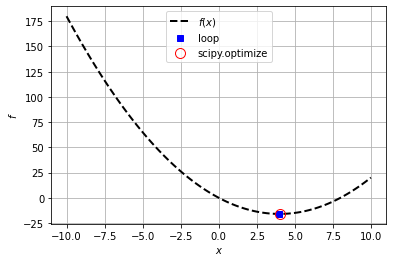

In [2]:
def f(x):
    return  x ** 2 - 8 * x

# b. solution avec boucle
import numpy as np
n = 100
x_vec = np.linspace(-10,10,n)
f_vec = np.empty(n)

f_best = np.inf # maximum initial
x_best = np.nan # ceci n'est pas un nombre("not a number")

for i,x in enumerate(x_vec):
    f_now = f_vec[i] = f(x)
    if f_now < f_best:
        x_best = x
        f_best = f_now

# c. solution avec scipy optmize
from scipy import optimize
x_guess = [0]      
objective_function = lambda x: f(x[0])
res = optimize.minimize(objective_function, x_guess, method='Nelder-Mead') 
x_best_scipy = res.x[0]
f_best_scipy = res.fun

# d. affichage
print(f'La meilleure boucle est {f_best:.8f} en x = {x_best:.8f}')
print(f'Avec scipy.optimize, {f_best_scipy:.8f} en x = {x_best_scipy:.8f}')

# e. graphique
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = points-per-inch(pouces) (résolution)
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',color='blue',label='loop')
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markersize=10,markerfacecolor='none',
        markeredgecolor='red',label='scipy.optimize')

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.grid(True)
ax.legend(loc='upper center');